In [1]:
import numpy as np
import pandas as pd

In [2]:
# Used encoding since the dataset is 'utf-8' encoded
df = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# Shape of dataframe
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning
# 2. Exploratory Data Analysis
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# We will drop last 3 columns as they contain very less elements
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [8]:
df.sample(5)

,v1,v2
375,ham,Can you say what happen
3665,ham,I'm turning off my phone. My moms telling ever...
1091,ham,Please da call me any mistake from my side sor...
2396,ham,Well you told others you'd marry them...
4489,ham,My computer just fried the only essential part...


In [9]:
# Renaming the columns
df.rename(columns = {'v1':'target', 'v2':'text'}, inplace = True)

In [10]:
df.columns

Index(['target', 'text'], dtype='object')

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df['target'] = labelencoder_X.fit_transform(df['target'])

In [12]:
df.sample(5)

,target,text
1180,0,I'm in chennai velachery:)
1404,0,Actually getting ready to leave the house.
815,0,Where's my boytoy? I miss you ... What happened?
1371,0,I though we shd go out n have some fun so bar ...
2595,1,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...


In [13]:
# ham is assigned '0' value
# spam is assigned '1' value

In [14]:
# Missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# check for duplicate values
df.duplicated().sum()

403

In [16]:
# Remove duplicates
df = df.drop_duplicates(keep = 'first')

In [17]:
# check for duplicate values
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

# 2. EDA

In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x19dcd242e20>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

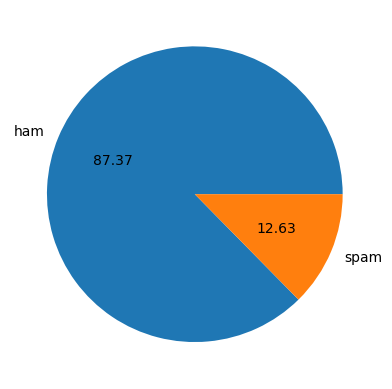

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct = '%0.2f')

In [21]:
# Data is imbalanced!

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [25]:
# No. of characters
df['num_characters']=df['text'].apply(len)

In [26]:
df.head(3)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [29]:
# num of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
# num of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [34]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [35]:
# spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [36]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

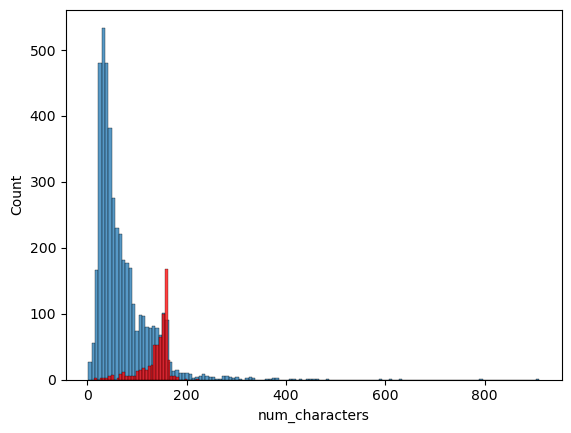

In [37]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')

In [38]:
# Spam messages have more number of characters on an average

<AxesSubplot:xlabel='num_words', ylabel='Count'>

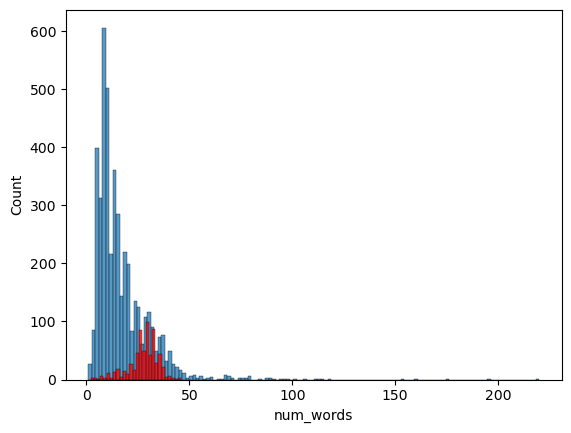

In [39]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

In [40]:
# This is bit diffenent but observation is same

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

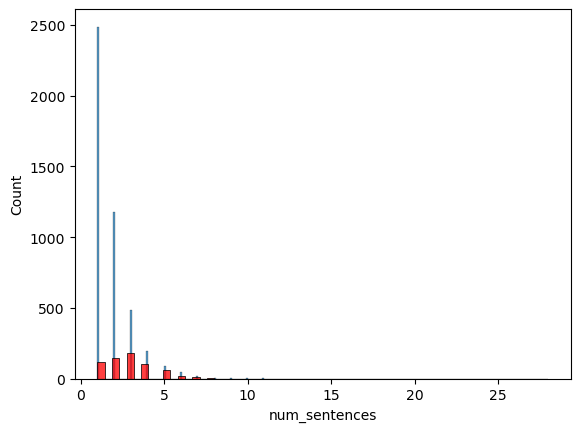

In [41]:
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color = 'red')

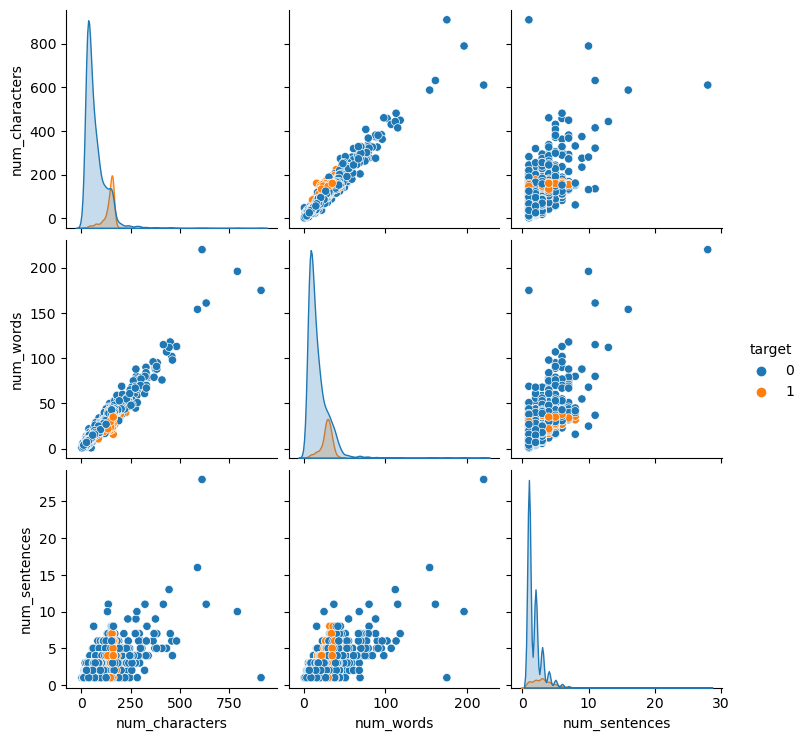

In [42]:
sns.pairplot(df, hue = 'target')

In [43]:
# There are few outliers, we will treat them later

In [44]:
# Correlation matrix
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

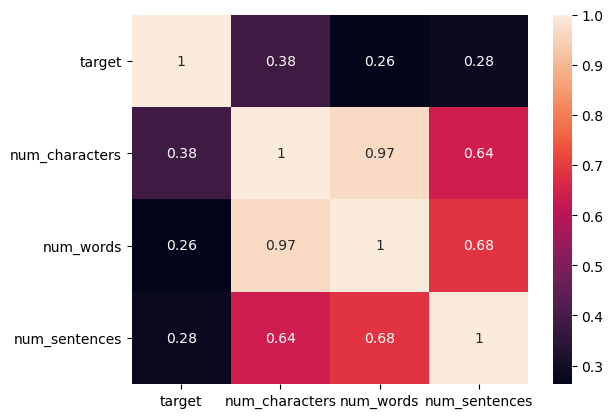

In [45]:
sns.heatmap(df.corr(), annot = True)

In [46]:
# We can clearly see that all three columns have strong correlation with each other
# We will keep just 'num_characters' because it has strong correlation with target

# 3. Data Preprocessing

1. Lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming

In [58]:
import re
import string
from nltk.corpus import stopwords
stopwords.words('english');

In [51]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [59]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    # Removing Alpha-Numeric data
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    # Removing stopwords
    for i in text:
        if i not in nltk.corpus.stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    # Stemming of words
    for i in text:
        y.append(ps.stem(i))
    text = y[:]    
    return " ".join(text)

In [60]:
# Testing 
transform_text('I loved the YT lecture@ machine learning. How about you?')

'love yt lectur machin learn'

In [61]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [62]:
df['transformed_text'] = df['text'].apply(transform_text)

In [63]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [65]:
# We will create Word-Cloud of Spam messages
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [66]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

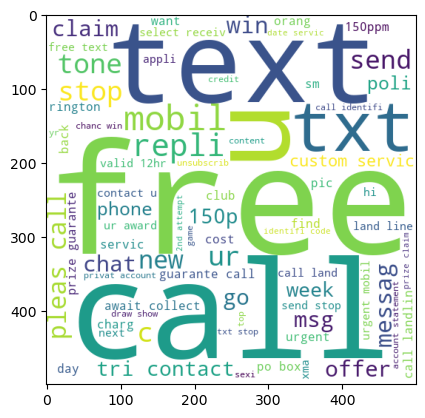

In [67]:
plt.imshow(spam_wc)

In [68]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

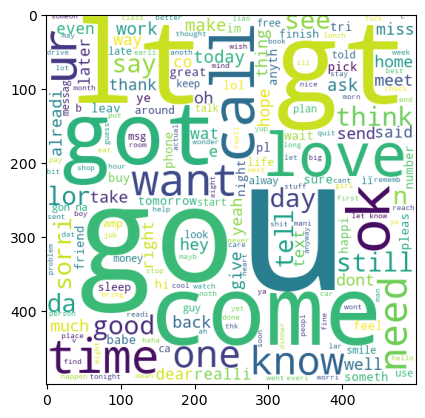

In [69]:
plt.imshow(ham_wc)

In [70]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [72]:
spam_corpus = []
for msg in df[df['target'] ==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [73]:
len(spam_corpus)

9939

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


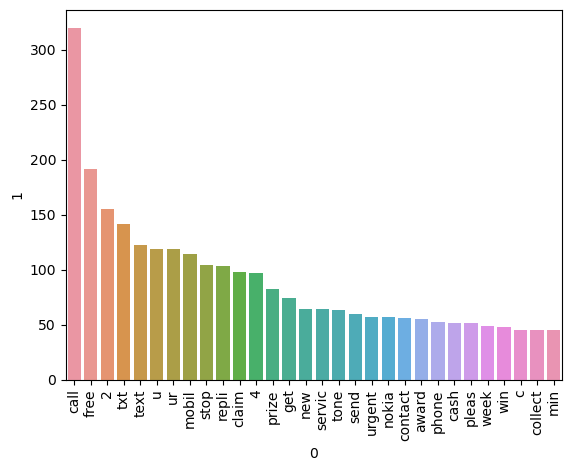

In [76]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [77]:
ham_corpus = []
for msg in df[df['target'] ==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [78]:
len(ham_corpus)

35394

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


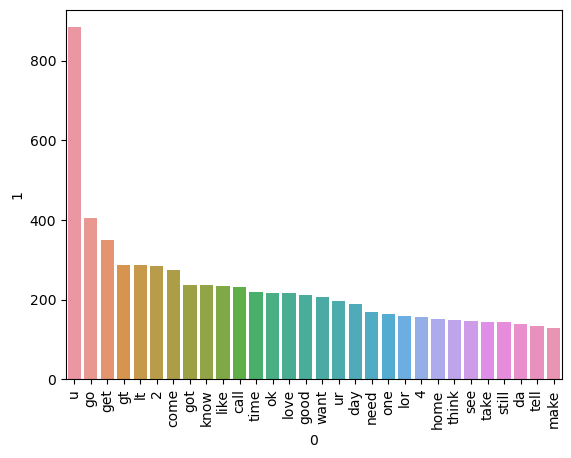

In [79]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

# 4. Model Building

In [91]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [92]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [93]:
y = df['target'].values

In [94]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [96]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [97]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [98]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8713733075435203
[[774 111]
 [ 22 127]]
0.5336134453781513


In [99]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9458413926499033
[[885   0]
 [ 56  93]]
1.0


In [100]:
# Since data is imbalanced, prcision score must be more 

In [101]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9661508704061895
[[881   4]
 [ 31 118]]
0.9672131147540983


In [102]:
# Using Bag-of-Words bnb is best
# Using tfidf mnb is best

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [105]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 0)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 0)
bc  = BaggingClassifier(n_estimators = 50, random_state = 0)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 0)
gbdt= GradientBoostingClassifier(n_estimators = 50, random_state = 0)
xgb = XGBClassifier(n_estimators = 50, random_state = 0)

In [106]:
clfs = {'SVC': svc,
        'KNN': knc,
        'NB': mnb,
        'DT': dtc,
        'LR': lrc,
        'RF': rfc,
        'AdaBoost': abc,
        'BgC': bc,
        'ETC': etc,
        'GBDT': gbdt,
        'xgb': xgb}

In [107]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [108]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For ",name)
    print("Accuracy", current_accuracy)
    print("Precision", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy 0.9690522243713733
Precision 0.975609756097561
For  KNN
Accuracy 0.8887814313346228
Precision 1.0
For  NB
Accuracy 0.9458413926499033
Precision 1.0
For  DT
Accuracy 0.9332688588007737
Precision 0.8773584905660378
For  LR
Accuracy 0.9564796905222437
Precision 0.956140350877193
For  RF
Accuracy 0.9748549323017408
Precision 1.0
For  AdaBoost
Accuracy 0.9671179883945842
Precision 0.9752066115702479
For  BgC
Accuracy 0.9632495164410058
Precision 0.8881118881118881
For  ETC
Accuracy 0.9748549323017408
Precision 1.0
For  GBDT
Accuracy 0.9574468085106383
Precision 0.972972972972973
For  xgb
Accuracy 0.9738878143133463
Precision 0.9765625


In [109]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [110]:
performance_df

,Algorithm,Accuracy,Precision
1,KNN,0.888781,1.000000
2,NB,0.945841,1.000000
5,RF,0.974855,1.000000
8,ETC,0.974855,1.000000
10,xgb,0.973888,0.976562
0,SVC,0.969052,0.975610
6,AdaBoost,0.967118,0.975207
9,GBDT,0.957447,0.972973
4,LR,0.956480,0.956140
7,BgC,0.963250,0.888112


In [ ]:
# model improve
# 1. Change the max_features parameter of Tfidf

In [111]:
# Voting Classifier
rfc = RandomForestClassifier(n_estimators = 50, random_state = 0)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 0)

from sklearn.ensemble import VotingClassifier

In [122]:
voting = VotingClassifier(estimators = [('RF',rfc), ('ETC', etc)],voting = 'soft')

In [123]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=0)),
                             ('ETC',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=0))],
                 voting='soft')

In [124]:
y_pred = voting.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9738878143133463
[[885   0]
 [ 27 122]]
1.0


In [125]:
# Applying Stacking Classifier
estimators = [('RF',rfc), ('ETC', etc)]
final_estimator = RandomForestClassifier()

In [126]:
from sklearn.ensemble import StackingClassifier

In [127]:
classifier = StackingClassifier(estimators = estimators, final_estimator = final_estimator)

In [128]:
classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('RF',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=0)),
                               ('ETC',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=0))],
                   final_estimator=RandomForestClassifier())

In [129]:
y_pred1 = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.97678916827853
[[877   8]
 [ 16 133]]
0.9432624113475178


In [130]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(etc, open('model.pkl','wb'))